# OpenDC MultiModel Demo

> this file assembles multiple simulation models into a single simulation tool -- <b>the multimodel</b>
> we leverage the outputs of the simulation models, in the same plot
> and more :>

### 0. Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pyarrow.parquet as pq
import fastparquet as fp

### 1. Load the outputs of the simulation models

In [2]:
os.chdir('../../../../../demo/output/simulation-results')
print("We are now in: ", os.getcwd())

# loop through the files, take only the first word of the file name, which is in format modelname-*
model_names = [file.split('-')[0] for file in os.listdir()]
directories = [d for d in os.listdir() if os.path.isdir(d)]

# output data is a list of lists -- there are multiple arrays, and each array has data for host, server, service, in this order
# basically we will have
host_data = []
server_data = []
service_data = []

print(directories)

# loop through each directory and add the data to the list
for directory in directories:
    host_data.append(pd.read_parquet(os.path.join(directory, 'host.parquet')))
    server_data.append(pd.read_parquet(os.path.join(directory, 'server.parquet')))
    service_data.append(pd.read_parquet(os.path.join(directory, 'service.parquet')))

We are now in:  /Users/raz/atlarge/opendc/demo/output/simulation-results
['scenario-simple-model-sqrt-scheduler-Mem-topology-topologies-single.json-5b0612be', 'scenario-simple-model-sqrt-scheduler-Mem-topology-topologies-very-single.json-569714b9', 'scenario-simple-model-sqrt-scheduler-Mem-topology-topologies-single.json-0ae33af2', 'scenario-simple-model-sqrt-scheduler-Mem-topology-topologies-very-single.json-e34f3784', 'scenario-simple-model-sqrt-scheduler-Mem-topology-topologies-single.json-3eb5716b', 'scenario-simple-model-sqrt-scheduler-Mem-topology-topologies-very-single.json-4c436f4d']


### 2. Define useful functions

In [3]:
def mean_of_chunks(series, chunk_size):
    return series.groupby(np.arange(len(series)) // chunk_size).mean(numeric_only=True)

In [4]:
def plot_singular_model(single_model):
    plt.figure(figsize=(20,10))
    plt.plot(single_model)
    plt.show()

In [5]:
def plot_multi_model(multi_model):
    plt.figure(figsize=(20,10))
    for model in multi_model:
        plt.ylabel("POwer draw [W]")
        plt.xlabel("Seconds [S]")
        # make y label start from 0
        
        # add some shadows up and down as a standard deviation
        # plt.fill_between(model.index, model - 10, model + 10, color='gray', alpha=0.5)
        
        plt.ylim(0, 500)
        plt.plot(model)
    plt.show()

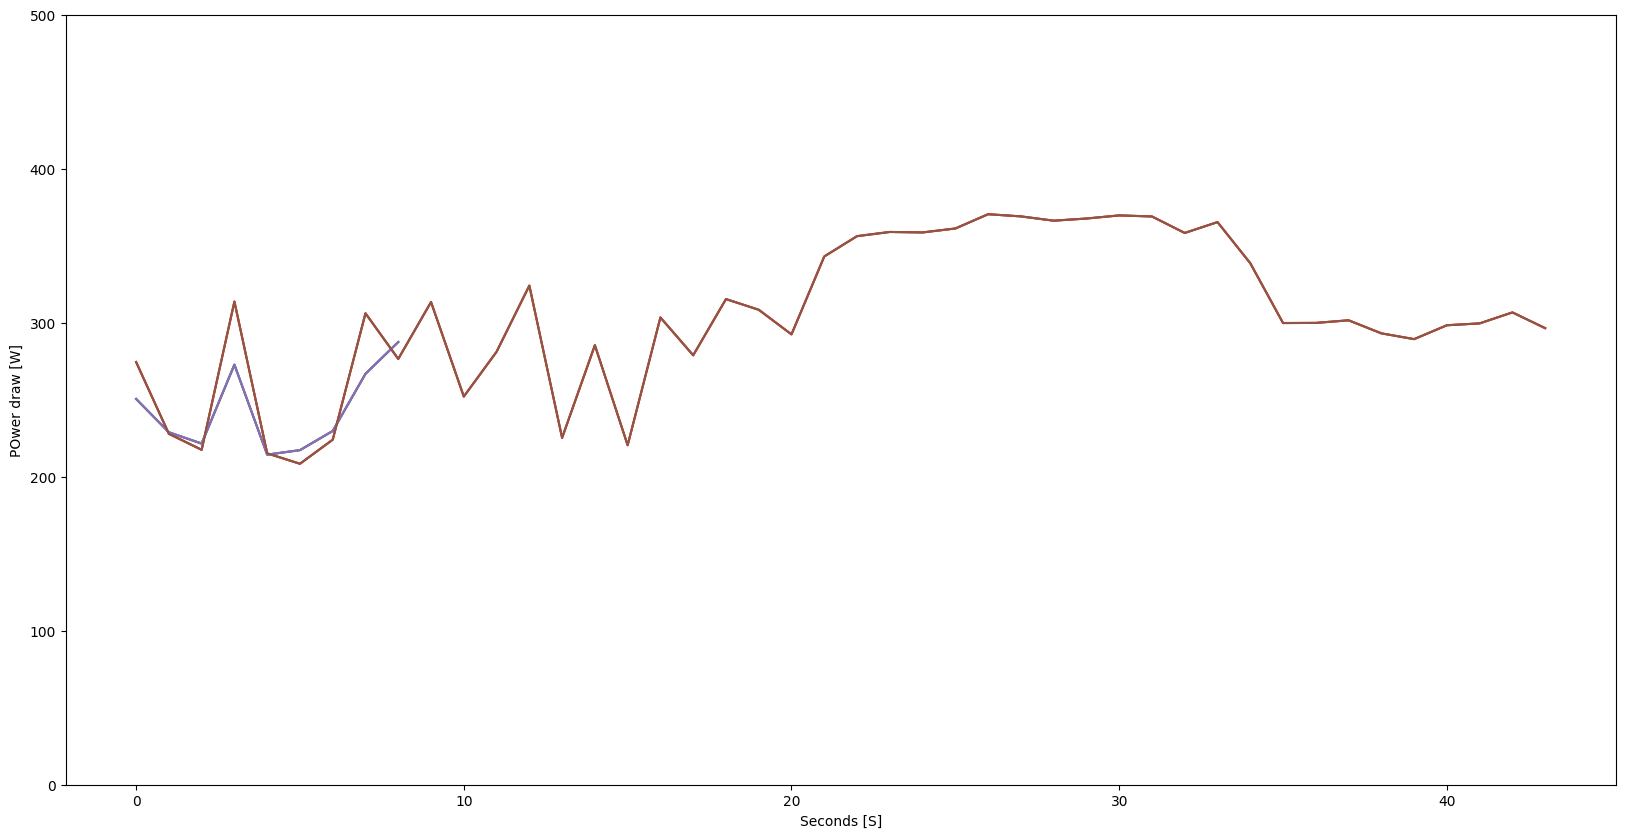

False


In [7]:
### 3. Plot the outputs of the simulation models
simulation_data = [
    mean_of_chunks(host_data[0]['power_draw'], 1000),
    mean_of_chunks(host_data[1]['power_draw'], 1000),
    mean_of_chunks(host_data[2]['power_draw'], 1000),
    mean_of_chunks(host_data[3]['power_draw'], 1000),
    mean_of_chunks(host_data[4]['power_draw'], 1000),
    mean_of_chunks(host_data[5]['power_draw'], 1000),
]

plot_multi_model(simulation_data)
areEqual = host_data[0].equals(host_data[3])
print(areEqual)

In [7]:
host_data[0]

,timestamp,absolute_timestamp,host_id,cpu_count,mem_capacity,guests_terminated,guests_running,guests_error,guests_invalid,cpu_limit,...,cpu_utilization,cpu_time_active,cpu_time_idle,cpu_time_steal,cpu_time_lost,power_draw,energy_usage,uptime,downtime,boot_time
0,300000,1376314846000,e220a839-7b1d-cdaf-0000-000000000001,32,10000000,0,44,0,0,102400.0,...,0.660362,6339487,3260513,1094,0,237.474668,71242.362832,300000,0,0
1,600000,1376315146000,e220a839-7b1d-cdaf-0000-000000000001,32,10000000,0,44,0,0,102400.0,...,0.634628,6092432,3507568,0,0,240.672868,72201.860498,300000,0,0
2,900000,1376315446000,e220a839-7b1d-cdaf-0000-000000000001,32,10000000,0,44,0,0,102400.0,...,0.617951,5932330,3667670,0,0,242.780275,72834.082440,300000,0,0
3,1200000,1376315746000,e220a839-7b1d-cdaf-0000-000000000001,32,10000000,0,44,0,0,102400.0,...,0.484583,4651998,4948002,0,0,260.775995,78232.798391,300000,0,0
4,1500000,1376316046000,e220a839-7b1d-cdaf-0000-000000000001,32,10000000,0,44,0,0,102400.0,...,0.437616,4201115,5398884,0,0,267.694868,80308.460543,300000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8637,2591400000,1378905946000,e220a839-7b1d-cdaf-0000-000000000001,32,10000000,0,48,0,0,102400.0,...,0.577180,5443637,4156363,0,0,248.055202,NaN,300000,0,0
8638,2591700000,1378906246000,e220a839-7b1d-cdaf-0000-000000000001,32,10000000,0,48,0,0,102400.0,...,0.559300,5515123,4084877,0,0,250.427216,NaN,300000,0,0
8639,2592000000,1378906546000,e220a839-7b1d-cdaf-0000-000000000001,32,10000000,0,48,0,0,102400.0,...,0.786777,5717938,3882062,0,0,222.599104,NaN,300000,0,0
8640,2592300000,1378906846000,e220a839-7b1d-cdaf-0000-000000000001,32,10000000,0,4,0,0,102400.0,...,0.002364,6348813,3251186,0,0,390.276536,NaN,300000,0,0


In [8]:
# print host_data as a table
service_data[0]


,timestamp,absolute_timestamp,hosts_up,hosts_down,servers_pending,servers_active,attempts_success,attempts_failure,attempts_error
0,300000,1376314846000,1,0,0,44,44,0,0
1,600000,1376315146000,1,0,0,44,44,0,0
2,900000,1376315446000,1,0,0,44,44,0,0
3,1200000,1376315746000,1,0,0,44,44,0,0
4,1500000,1376316046000,1,0,0,44,44,0,0
...,...,...,...,...,...,...,...,...,...
8637,2591400000,1378905946000,1,0,0,48,50,0,0
8638,2591700000,1378906246000,1,0,0,48,50,0,0
8639,2592000000,1378906546000,1,0,0,48,50,0,0
8640,2592300000,1378906846000,1,0,0,4,50,0,0
